In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#################################
#                               #
# Get started with ASA DataFest #
#                               #
#################################

# In this Python script, we demonstrate how to:
# 1) Access the ASA DataFest 2024 dataset.
# 2) Read the data into Pandas dataframes.
# 3) Conduct basic analysis.

#################################
#                               #
#   Step 1: Access the data     #
#                               #
#################################

# To access the ASA dataset, use this link: 
# https://bwsyncandshare.kit.edu/s/ErACwGqLAJ9iyxS ##TO BE UPDATED
# Unzip the data into the same directory as this Python script.
# Read the documentation carefully to understand the contents of the dataset.

#################################
#                               #
#   Step 2: Read the data       #
#                               #
#################################

data_directory = '2024-ASADataFest-Data-and-Documentation/2024-ASADataFest-Data-and-Documentation/'
checkpoints = pd.read_csv(data_directory + 'Data Files/checkpoints.csv')
items = pd.read_csv(data_directory + 'Data Files/items.csv')
media_views = pd.read_csv(data_directory + 'Data Files/media_views.csv')
page_views = pd.read_csv(data_directory + 'Data Files/page_views.csv')
responses = pd.read_csv(data_directory + 'Data Files/responses.csv')


C:\Users\jack\AppData\Local\Temp\ipykernel_10604\1744345071.py:37: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views = pd.read_csv(data_directory + 'Data Files/page_views.csv')
C:\Users\jack\AppData\Local\Temp\ipykernel_10604\1744345071.py:38: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  responses = pd.read_csv(data_directory + 'Data Files/responses.csv')


In [11]:

#################################
#                               #
#   Step 3: Example Analysis    #
#                               #
#################################

# Question: Are responses more often correct when the student has retried more 
# pages in that chapter?

# Derive each individual student's portion of correct item responses per chapter.
responses['score'] = responses['points_earned'] / responses['points_possible']
average_scores = responses.groupby(['student_id', 'chapter'])['score'].mean().reset_index()

# Derive each student's number of 'try again' clicks per chapter.
average_try_again_clicks = page_views.groupby(['student_id', 'chapter'])['tried_again_clicks'].mean().reset_index()

# Join the two tables together using 'student_id' and 'chapter' as a 
# composite key.
results = pd.merge(average_scores, average_try_again_clicks, on=['student_id', 'chapter'], how='left')


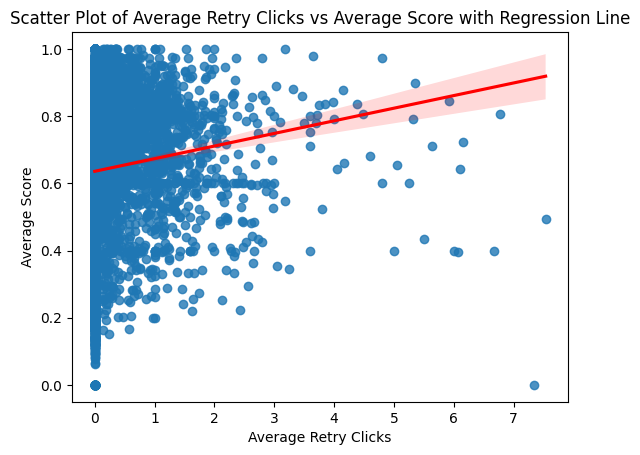

In [12]:
# Visualize the results by scatter-plotting the average scores with the average 
# number of retries.
lm_model = sns.regplot(data=results, x='tried_again_clicks', y='score', line_kws={"color":"red"})
plt.xlabel("Average Retry Clicks")
plt.ylabel("Average Score")
plt.title("Scatter Plot of Average Retry Clicks vs Average Score with Regression Line")
plt.show()

#################################
#                               #
#  Step 4: Enjoy DataFest 2024! #
#                               #
#################################
